In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from imutils import paths
from sklearn.utils import shuffle
from tqdm import tqdm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/verikumesi2/test/'

cardboard  glass  metal  paper	plastic  trash


In [0]:
# parameters
batch_size = 32
target_size = (224, 224)

root = '/content/gdrive/My Drive/'
 
full_dataset_path = root + 'verikumesi2/train/'
labels = {'trash': 5, 'glass': 1, 'plastic': 4, 'cardboard': 0, 'paper': 3, 'metal': 2}


#######################################################################################
#TRAIN
x_full = []
labels_full = []

x_cardboard = []
x_glass = []
x_metal = []
x_paper = []
x_plastic = []
x_trash = []


for label in labels:
  path = full_dataset_path + label
  
  full_dataset_imagePaths = sorted(list(paths.list_images(str(path))))
  
  print(label)
  
  for i in tqdm(range(len(full_dataset_imagePaths))):
    imagePath = full_dataset_imagePaths[i]

    #print(imagePath)
    img = cv2.imread(imagePath)
    #img = cv2.resize(img, target_size).flatten()
    img = cv2.resize(img, target_size)
    x_full.append(img)

    
    label = imagePath.split(os.path.sep)[-2]
    labels_full.append(labels[label])
    
    if label == "cardboard":
        x_cardboard.append(img)
    elif label == "glass":
        x_glass.append(img)
    elif label == "metal":
        x_metal.append(img)
    elif label == "paper":
        x_paper.append(img)
    elif label == "plastic":
        x_plastic.append(img)
    elif label == "trash":
        x_trash.append(img)    
    
print("len", len(x_full))
print("shape", x_full[0].shape)
print("len labels_full", len(labels_full))

 24%|██▍       | 24/100 [00:00<00:00, 239.47it/s]

trash


  6%|▋         | 23/356 [00:00<00:01, 225.23it/s]

glass


  6%|▋         | 22/345 [00:00<00:01, 212.78it/s]

plastic


  9%|▉         | 23/262 [00:00<00:01, 220.74it/s]

cardboard


  5%|▌         | 21/412 [00:00<00:01, 205.78it/s]

paper


  8%|▊         | 23/295 [00:00<00:01, 229.10it/s]

metal


100%|██████████| 295/295 [00:01<00:00, 214.81it/s]

len 1770
shape (224, 224, 3)
len labels_full 1770


In [0]:
!ls '/content/gdrive/My Drive/verikumesi2/val/'

cardboard  glass  metal  paper	plastic  trash


In [0]:
#VAL
################################################

full_dataset_path2 = root + 'verikumesi2/val/'
vals = {'trash': 5, 'glass': 1, 'plastic': 4, 'cardboard': 0, 'paper': 3, 'metal': 2}

x_full2 = []
labels_full2 = []

x_cardboard2 = []
x_glass2 = []
x_metal2 = []
x_paper2 = []
x_plastic2 = []
x_trash2 = []


for val in vals:
  path2 = full_dataset_path2 + val
  
  full_dataset_imagePaths2 = sorted(list(paths.list_images(str(path2))))
  
  print(val)
  
  for j in tqdm(range(len(full_dataset_imagePaths2))):
    imagePath2 = full_dataset_imagePaths2[j]

    #print(imagePath)
    img2 = cv2.imread(imagePath2)
    #img = cv2.resize(img, target_size).flatten()
    img2 = cv2.resize(img2, target_size)
    x_full2.append(img2)

    
    val = imagePath2.split(os.path.sep)[-2]
    labels_full2.append(vals[val])
    
    if val == "cardboard":
        x_cardboard2.append(img2)
    elif val == "glass":
        x_glass2.append(img2)
    elif val == "metal":
        x_metal2.append(img2)
    elif val == "paper":
        x_paper2.append(img2)
    elif val == "plastic":
        x_plastic2.append(img2)
    elif val == "trash":
        x_trash2.append(img2)    
    
print("len", len(x_full2))
print("shape", x_full2[0].shape)
print("len labels_full", len(labels_full2))

  0%|          | 0/17 [00:00<?, ?it/s]

trash


  0%|          | 0/59 [00:00<?, ?it/s]

glass


  0%|          | 0/63 [00:00<?, ?it/s]

plastic


  2%|▏         | 1/65 [00:00<00:12,  5.14it/s]

cardboard


  0%|          | 0/79 [00:00<?, ?it/s]

paper


  2%|▏         | 1/45 [00:00<00:08,  5.25it/s]

metal


100%|██████████| 45/45 [00:14<00:00,  3.83it/s]

len 328
shape (224, 224, 3)
len labels_full 328


In [0]:
!ls '/content/gdrive/My Drive/verikumesi2/test/'

cardboard  glass  metal  paper	plastic  trash


In [0]:
#TEST
################################################

full_dataset_path3 = root + 'verikumesi2/test/'
tests = {'trash': 5, 'glass': 1, 'plastic': 4, 'cardboard': 0, 'paper': 3, 'metal': 2}

x_full3 = []
labels_full3 = []

x_cardboard3 = []
x_glass3 = []
x_metal3 = []
x_paper3 = []
x_plastic3 = []
x_trash3 = []


for test in tests:
  path3 = full_dataset_path3 + test
  
  full_dataset_imagePaths3 = sorted(list(paths.list_images(str(path3))))
  
  print(test)
  print('full_dataset_imagePaths3 = ' ,full_dataset_imagePaths3)
  
  for k in tqdm(range(len(full_dataset_imagePaths3))):
    imagePath3 = full_dataset_imagePaths3[k]

    #print(imagePath)
    img3 = cv2.imread(imagePath3)
    #img = cv2.resize(img, target_size).flatten()
    img3 = cv2.resize(img3, target_size)
    x_full3.append(img3)

    
    test = imagePath3.split(os.path.sep)[-2]
    labels_full3.append(tests[test])
    
    if test == "cardboard":
        x_cardboard3.append(img3)
    elif test == "glass":
        x_glass3.append(img3)
    elif test == "metal":
        x_metal3.append(img3)
    elif test == "paper":
        x_paper3.append(img3)
    elif test == "plastic":
        x_plastic3.append(img3)
    elif test == "trash":
        x_trash3.append(img3)    
    
print("len", len(x_full3))
print("shape", x_full3[0].shape)
print("len labels_full", len(labels_full3))

  0%|          | 0/86 [00:00<?, ?it/s]

trash
full_dataset_imagePaths3 =  ['/content/gdrive/My Drive/verikumesi2/test/trash/trash10.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash106.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash110.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash121.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash125.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash128.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash130.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash135.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash25.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash28.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash30.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash34.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash41.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash45.jpg', '/content/gdrive/My Drive/verikumesi2/test/trash/trash49.jpg', '/content/gdr

 28%|██▊       | 21/74 [00:00<00:00, 204.14it/s]

plastic
full_dataset_imagePaths3 =  ['/content/gdrive/My Drive/verikumesi2/test/plastic/plastic10.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic114.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic116.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic12.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic129.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic136.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic138.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic139.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic145.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic153.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic155.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic16.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic160.jpg', '/content/gdrive/My Drive/verikumesi2/test/plastic/plastic163.jpg', '/content/gdri

 25%|██▌       | 19/76 [00:00<00:00, 187.43it/s]

cardboard
full_dataset_imagePaths3 =  ['/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard101.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard105.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard106.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard121.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard132.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard133.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard139.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard141.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard142.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard143.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard144.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard145.jpg', '/content/gdrive/My Drive/verikumesi2/test/cardboard/cardboard155.jpg', '/content/gdrive/My Drive

 17%|█▋        | 18/103 [00:00<00:00, 178.77it/s]

paper
full_dataset_imagePaths3 =  ['/content/gdrive/My Drive/verikumesi2/test/paper/paper113.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper120.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper126.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper13.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper145.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper146.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper152.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper159.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper161.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper163.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper165.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper168.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper17.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper176.jpg', '/content/gdrive/My Drive/verikumesi2/test/paper/paper178.jpg', '/conte

 30%|███       | 21/70 [00:00<00:00, 203.46it/s]

metal
full_dataset_imagePaths3 =  ['/content/gdrive/My Drive/verikumesi2/test/metal/metal101.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal102.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal122.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal13.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal133.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal138.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal153.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal159.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal160.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal166.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal175.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal18.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal182.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal185.jpg', '/content/gdrive/My Drive/verikumesi2/test/metal/metal19.jpg', '/conten

100%|██████████| 70/70 [00:00<00:00, 181.60it/s]

len 429
shape (224, 224, 3)
len labels_full 429


In [0]:
list(labels.keys())

['trash', 'glass', 'plastic', 'cardboard', 'paper', 'metal']

In [0]:
#cardboard  glass  metal  paper	plastic  trash

total_cardboard = len(x_cardboard) + len(x_cardboard2) + len(x_cardboard3)
total_glass     = len(x_glass)     + len(x_glass2)     + len(x_glass3)
total_metal     = len(x_metal)     + len(x_metal2)     + len(x_metal3)
total_paper     = len(x_paper)     + len(x_paper2)     + len(x_paper3)
total_plastic   = len(x_plastic)   + len(x_plastic2)   + len(x_plastic3)
total_trash     = len(x_trash)     + len(x_trash2)     + len(x_trash3)


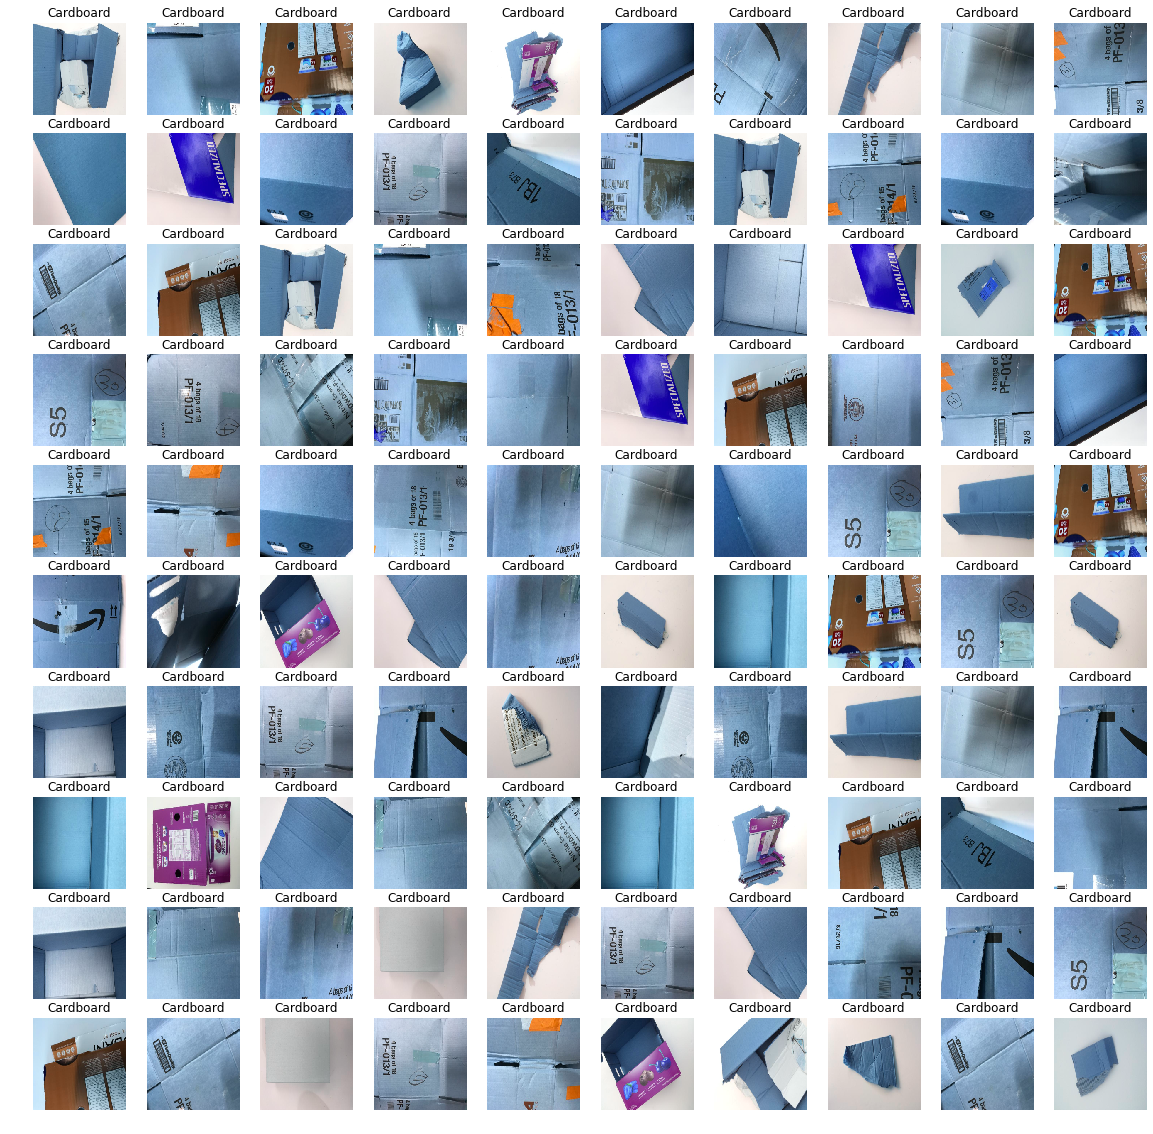

In [0]:
import random
plt.figure(figsize=(20,20))

prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, len(x_cardboard3)-1)
    image = x_cardboard3[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(10, 10, i+1)
    plt.title("Cardboard")
    plt.imshow(image)
    plt.axis('off')

plt.show()

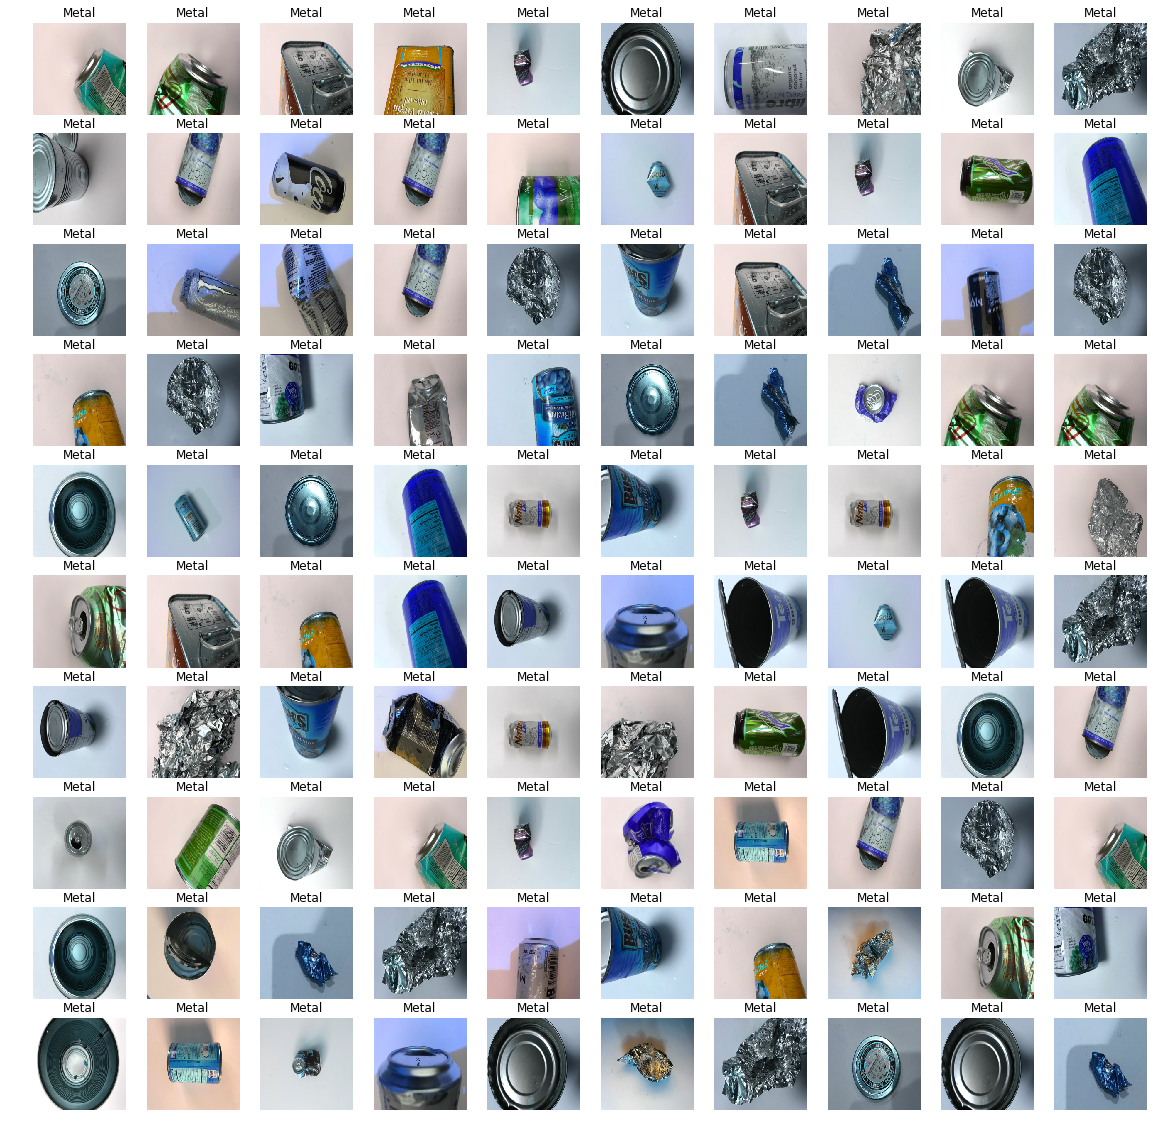

In [0]:
import random
plt.figure(figsize=(20,20))

prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, len(x_metal)-1)
    image = x_metal[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(10, 10, i+1)
    plt.title("Metal")
    plt.imshow(image)
    plt.axis('off')

plt.show()

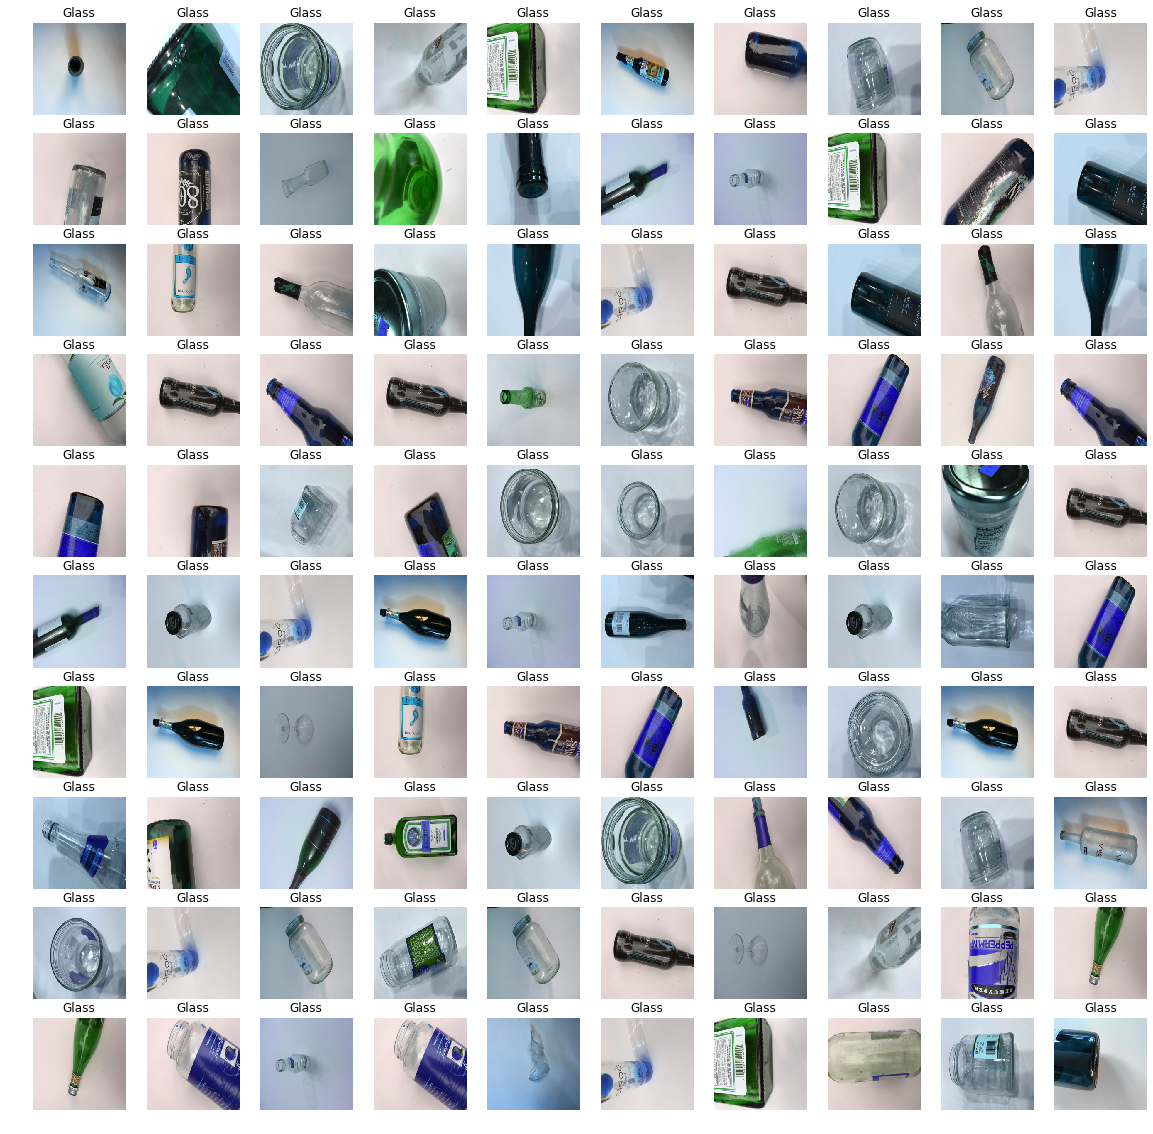

In [0]:
import random
plt.figure(figsize=(20,20))

prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, len(x_glass)-1)
    image = x_glass[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(10, 10, i+1)
    plt.title("Glass")
    plt.imshow(image)
    plt.axis('off')

plt.show()

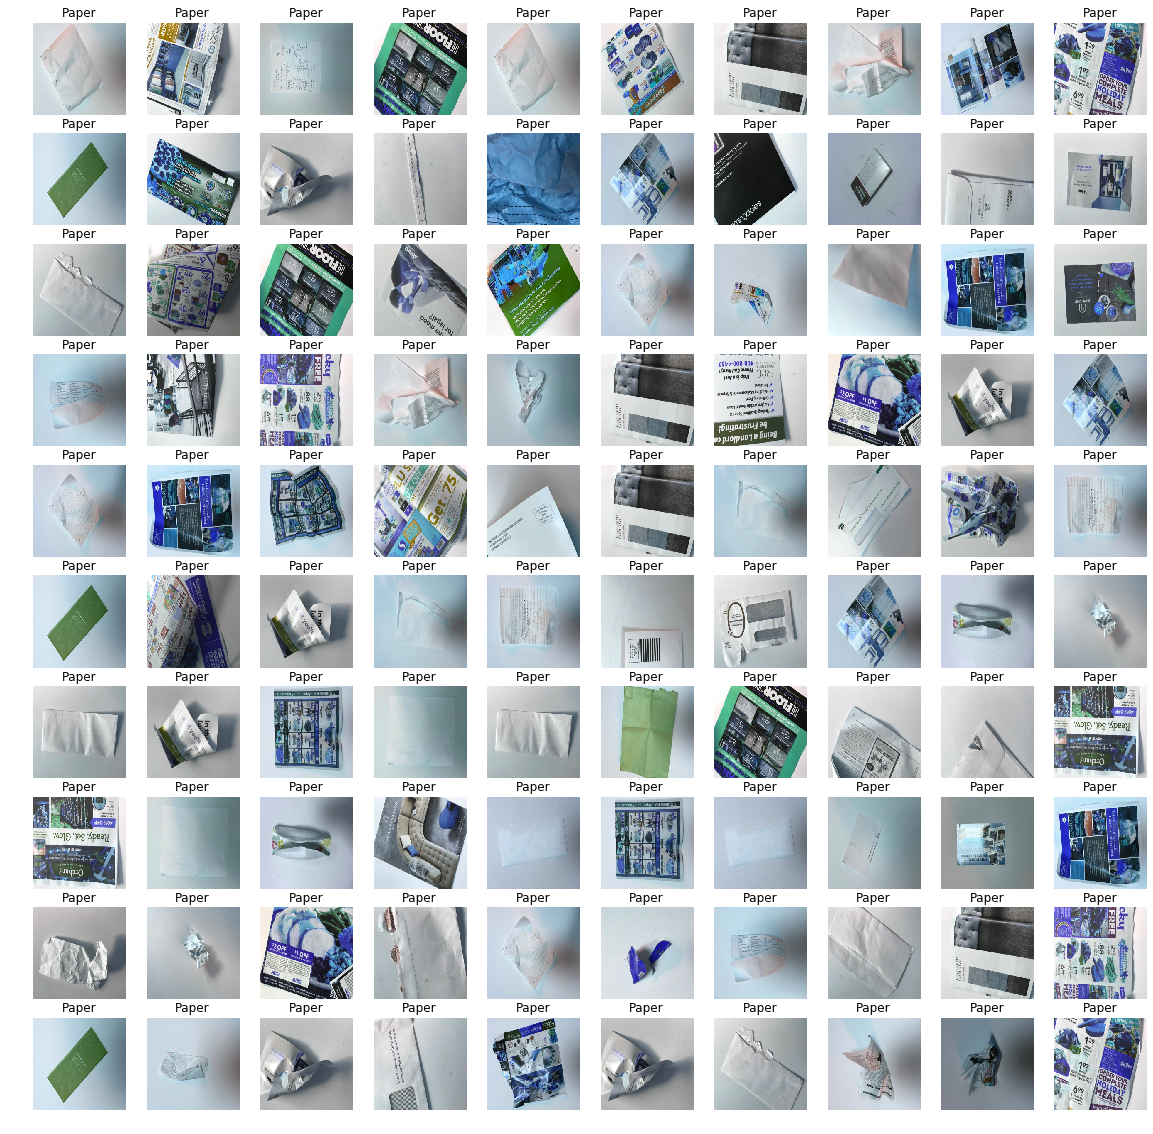

In [0]:
import random
plt.figure(figsize=(20,20))

prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, len(x_paper)-1)
    image = x_paper[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(10, 10, i+1)
    plt.title("Paper")
    plt.imshow(image)
    plt.axis('off')

plt.show()

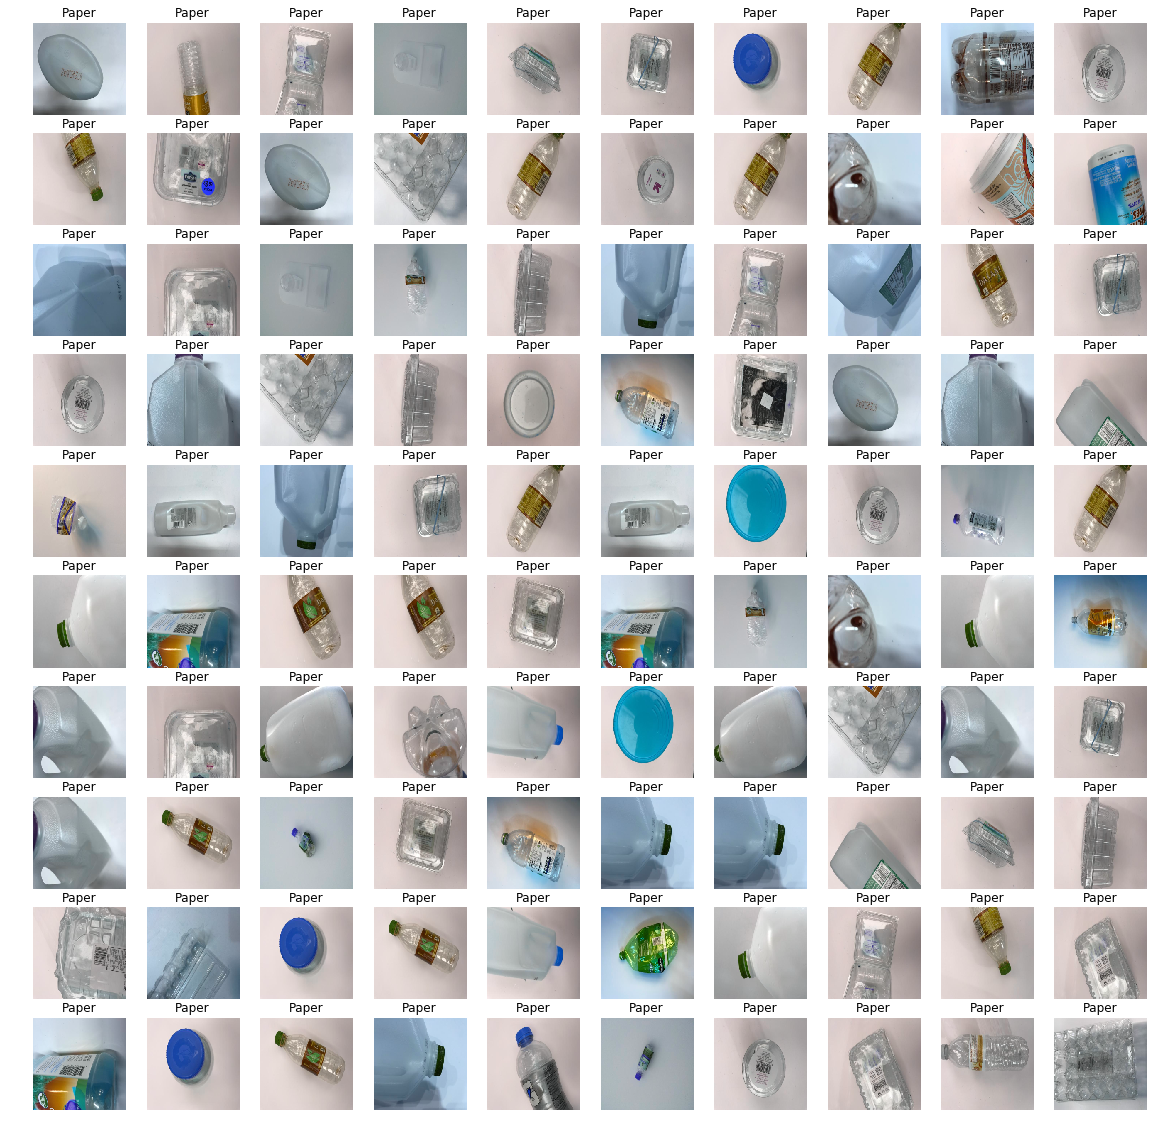

In [0]:
import random
plt.figure(figsize=(20,20))

prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, len(x_plastic)-1)
    image = x_plastic[index]
    data = np.expand_dims(image, axis=0) 
    
    plt.subplot(10, 10, i+1)
    plt.title("Paper")
    plt.imshow(image)
    plt.axis('off')

plt.show()

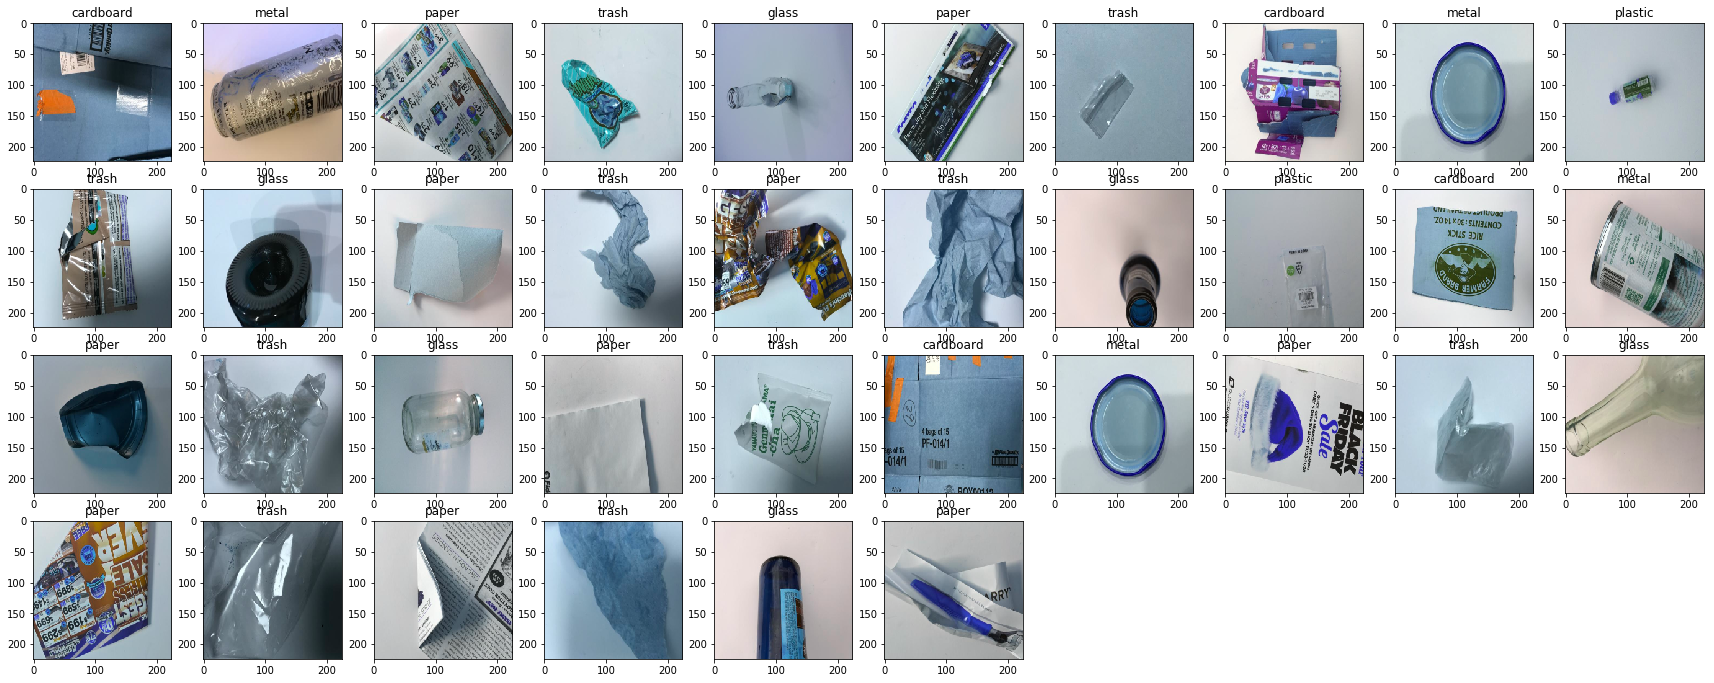

In [0]:
import random
plt.figure(figsize=(30,30))

prefictionNum = 1

for i in range(prefictionNum):
    index = random.randint(0, len(x_cardboard)-1)
    image = x_cardboard[index]
    data = np.expand_dims(image, axis=0) 
    plt.subplot(10, 10, i+1)
    plt.title("cardboard")
    plt.imshow(image)
    
    
    index = random.randint(0, len(x_metal)-1)
    image2 = x_metal[index]
    data = np.expand_dims(image2, axis=1) 
    plt.subplot(10, 10, i+2)
    plt.title("metal")
    plt.imshow(image2)
    
    
    index = random.randint(0, len(x_paper)-1)
    image3 = x_paper[index]
    data = np.expand_dims(image3, axis=1) 
    plt.subplot(10, 10, i+3)
    plt.title("paper")
    plt.imshow(image3)
    
    
    index = random.randint(0, len(x_trash)-1)
    image4 = x_trash[index]
    data = np.expand_dims(image4, axis=1) 
    plt.subplot(10, 10, i+4)
    plt.title("trash")
    plt.imshow(image4)
    
    
    index = random.randint(0, len(x_glass)-1)
    image5 = x_glass[index]
    data = np.expand_dims(image5, axis=1) 
    plt.subplot(10, 10, i+5)
    plt.title("glass")
    plt.imshow(image5)

    
    index = random.randint(0, len(x_paper)-1)
    image6 = x_paper[index]
    data = np.expand_dims(image6, axis=0) 
    plt.subplot(10, 10, i+6)
    plt.title("paper")
    plt.imshow(image6)
    
    
    index = random.randint(0, len(x_trash)-1)
    image7 = x_trash[index]
    data = np.expand_dims(image7, axis=1) 
    plt.subplot(10, 10, i+7)
    plt.title("trash")
    plt.imshow(image7)
    
    
    index = random.randint(0, len(x_cardboard)-1)
    image8 = x_cardboard[index]
    data = np.expand_dims(image, axis=0) 
    plt.subplot(10, 10, i+8)
    plt.title("cardboard")
    plt.imshow(image8)
    
    
    index = random.randint(0, len(x_metal)-1)
    image9 = x_metal[index]
    data = np.expand_dims(image9, axis=1) 
    plt.subplot(10, 10, i+9)
    plt.title("metal")
    plt.imshow(image9)
    
    
    index = random.randint(0, len(x_plastic)-1)
    image10 = x_plastic[index]
    data = np.expand_dims(image10, axis=1) 
    plt.subplot(10, 10, i+10)
    plt.title("plastic")
    plt.imshow(image10)
    
    
    index = random.randint(0, len(x_trash)-1)
    image11 = x_trash[index]
    data = np.expand_dims(image11, axis=1) 
    plt.subplot(10, 10, i+11)
    plt.title("trash")
    plt.imshow(image11)
    
    
    index = random.randint(0, len(x_glass)-1)
    image12 = x_glass[index]
    data = np.expand_dims(image12, axis=1) 
    plt.subplot(10, 10, i+12)
    plt.title("glass")
    plt.imshow(image12)

    
    index = random.randint(0, len(x_paper)-1)
    image13 = x_paper[index]
    data = np.expand_dims(image13, axis=1) 
    plt.subplot(10, 10, i+13)
    plt.title("paper")
    plt.imshow(image13)
   
  
    index = random.randint(0, len(x_trash)-1)
    image14 = x_trash[index]
    data = np.expand_dims(image14, axis=0) 
    plt.subplot(10, 10, i+14)
    plt.title("trash")
    plt.imshow(image14)
    
    
    index = random.randint(0, len(x_paper)-1)
    image15 = x_paper[index]
    data = np.expand_dims(image15, axis=1)
    plt.subplot(10, 10, i+15)
    plt.title("paper")
    plt.imshow(image15)
    
    
    index = random.randint(0, len(x_trash)-1)
    image16 = x_trash[index]
    data = np.expand_dims(image16, axis=1) 
    plt.subplot(10, 10, i+16)
    plt.title("trash")
    plt.imshow(image16)
    
    
    index = random.randint(0, len(x_glass)-1)
    image17 = x_glass[index]
    data = np.expand_dims(image17, axis=1) 
    plt.subplot(10, 10, i+17)
    plt.title("glass")
    plt.imshow(image17)

    
    index = random.randint(0, len(x_plastic)-1)
    image18 = x_plastic[index]
    data = np.expand_dims(image18, axis=1) 
    plt.subplot(10, 10, i+18)
    plt.title("plastic")
    plt.imshow(image18)
    
    index = random.randint(0, len(x_cardboard)-1)
    image19 = x_cardboard[index]
    data = np.expand_dims(image, axis=0) 
    plt.subplot(10, 10, i+19)
    plt.title("cardboard")
    plt.imshow(image19)
    
    
    index = random.randint(0, len(x_metal)-1)
    image20 = x_metal[index]
    data = np.expand_dims(image20, axis=1) 
    plt.subplot(10, 10, i+20)
    plt.title("metal")
    plt.imshow(image20)
    
    
    index = random.randint(0, len(x_paper)-1)
    image21 = x_paper[index]
    data = np.expand_dims(image21, axis=1) 
    plt.subplot(10, 10, i+21)
    plt.title("paper")
    plt.imshow(image21)
    
    
    index = random.randint(0, len(x_trash)-1)
    image22 = x_trash[index]
    data = np.expand_dims(image22, axis=1) 
    plt.subplot(10, 10, i+22)
    plt.title("trash")
    plt.imshow(image22)
    
    
    index = random.randint(0, len(x_glass)-1)
    image23 = x_glass[index]
    data = np.expand_dims(image23, axis=1) 
    plt.subplot(10, 10, i+23)
    plt.title("glass")
    plt.imshow(image23)

    
    index = random.randint(0, len(x_paper)-1)
    image24 = x_paper[index]
    data = np.expand_dims(image24, axis=0) 
    plt.subplot(10, 10, i+24)
    plt.title("paper")
    plt.imshow(image24)
    
    
    index = random.randint(0, len(x_trash)-1)
    image25 = x_trash[index]
    data = np.expand_dims(image25, axis=1) 
    plt.subplot(10, 10, i+25)
    plt.title("trash")
    plt.imshow(image25)
    
    
    index = random.randint(0, len(x_cardboard)-1)
    image26 = x_cardboard[index]
    data = np.expand_dims(image, axis=0) 
    plt.subplot(10, 10, i+26)
    plt.title("cardboard")
    plt.imshow(image26)
    
    
    index = random.randint(0, len(x_metal)-1)
    image27 = x_metal[index]
    data = np.expand_dims(image27, axis=1) 
    plt.subplot(10, 10, i+27)
    plt.title("metal")
    plt.imshow(image27)
    
    
    index = random.randint(0, len(x_paper)-1)
    image28 = x_paper[index]
    data = np.expand_dims(image28, axis=1) 
    plt.subplot(10, 10, i+28)
    plt.title("paper")
    plt.imshow(image28)
    
    
    index = random.randint(0, len(x_trash)-1)
    image29 = x_trash[index]
    data = np.expand_dims(image29, axis=1) 
    plt.subplot(10, 10, i+29)
    plt.title("trash")
    plt.imshow(image29)
    
    
    index = random.randint(0, len(x_glass)-1)
    image30 = x_glass[index]
    data = np.expand_dims(image30, axis=1) 
    plt.subplot(10, 10, i+30)
    plt.title("glass")
    plt.imshow(image30)

    
    index = random.randint(0, len(x_paper)-1)
    image31 = x_paper[index]
    data = np.expand_dims(image31, axis=1) 
    plt.subplot(10, 10, i+31)
    plt.title("paper")
    plt.imshow(image31)
   
  
    index = random.randint(0, len(x_trash)-1)
    image32 = x_trash[index]
    data = np.expand_dims(image32, axis=0) 
    plt.subplot(10, 10, i+32)
    plt.title("trash")
    plt.imshow(image32)
    
    
    index = random.randint(0, len(x_paper)-1)
    image33 = x_paper[index]
    data = np.expand_dims(image33, axis=1)
    plt.subplot(10, 10, i+33)
    plt.title("paper")
    plt.imshow(image33)
    
    
    index = random.randint(0, len(x_trash)-1)
    image34 = x_trash[index]
    data = np.expand_dims(image34, axis=1) 
    plt.subplot(10, 10, i+34)
    plt.title("trash")
    plt.imshow(image34)
    
    
    index = random.randint(0, len(x_glass)-1)
    image35 = x_glass[index]
    data = np.expand_dims(image35, axis=1) 
    plt.subplot(10, 10, i+35)
    plt.title("glass")
    plt.imshow(image35)

    
    index = random.randint(0, len(x_paper)-1)
    image36 = x_paper[index]
    data = np.expand_dims(image36, axis=1) 
    plt.subplot(10, 10, i+36)
    plt.title("paper")
    plt.imshow(image36)


plt.show()



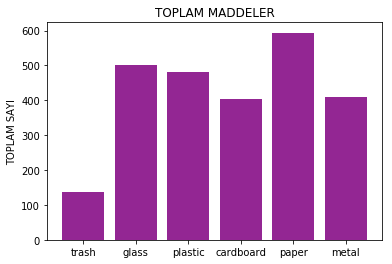

In [0]:
import matplotlib.pyplot as plt; 
import numpy as np
import matplotlib.pyplot as plt
import plotly.tools as tls

objects = ('trash', 'glass', 'plastic', 'cardboard', 'paper', 'metal')

y_pos = np.arange(len(objects))
performance = [total_trash, total_glass , total_plastic ,  total_cardboard , total_paper , total_metal ]


plt.bar(y_pos, performance, align='center', alpha=0.85 , color = 'purple')
plt.xticks(y_pos, objects)
plt.ylabel('TOPLAM SAYI')
plt.title('TOPLAM MADDELER')




plt.show()


Text(0.5, 1.0, 'TRAIN İÇİN MADDELER')

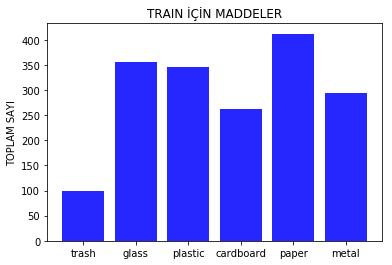

In [0]:
objects = ('trash', 'glass', 'plastic', 'cardboard', 'paper', 'metal')

y_pos = np.arange(len(objects))
performance = [ len(x_trash), len(x_glass) , len(x_plastic) ,  len(x_cardboard) , len(x_paper) , len(x_metal) ]


plt.bar(y_pos, performance, align='center', alpha=0.85 , color = 'blue')
plt.xticks(y_pos, objects)
plt.ylabel('TOPLAM SAYI')
plt.title('TRAIN İÇİN MADDELER')


Text(0.5, 1.0, 'TEST İÇİN MADDELER')

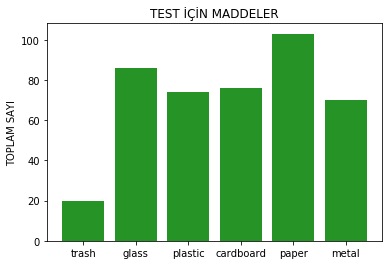

In [0]:
objects = ('trash', 'glass', 'plastic', 'cardboard', 'paper', 'metal')

y_pos = np.arange(len(objects))
performance = [ len(x_trash3), len(x_glass3) , len(x_plastic3) ,  len(x_cardboard3) , len(x_paper3) , len(x_metal3) ]


plt.bar(y_pos, performance, align='center', alpha=0.85 , color = 'green')
plt.xticks(y_pos, objects)
plt.ylabel('TOPLAM SAYI')
plt.title('TEST İÇİN MADDELER')